In [2]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
import time
import scipy.stats as stats
import scipy.optimize as opt
import scipy.integrate as intgr
import scipy.linalg as la
from scipy import sparse
import sympy
import math

# Numerical Integration Problem Set

Problem 1

In [2]:
def prob1(a,b,N,method):
    if method=='midpoint':
        x = np.zeros(N)
        for i in range(N):
            x[i] = a+((2*i+1)*(b-a)/(2*N))
        integral = ((b-a)/N)*np.sum(g(x))
    elif method =='trapezoid':
        x = np.zeros(N+1)
        for i in range(N+1):
            x[i] = a + (i*(b-a)/N)
        integral = ((b-a)/(2*N))*(g(x)[0] + 2*np.sum(g(x)[1:-1]) + g(x)[-1])
    elif method == 'simpsons':
        x = np.zeros((2*N)+1)
        for i in range((2*N)+1):
            x[i] = a+i*((b-a)/(2*N))
        x_odd = x[1::2]
        x_even = x[2::2][:-1]
        integral = (1/2)*((b-a)/(3*(N+1)))*((g(x)[0])+ 4*np.sum(g(x_odd))+2*np.sum(g(x_even))+g(x)[-1])
    return integral

def g(x):
    func = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
    return func

midpoint = prob1(-10,10, 10000, 'midpoint')
trapezoid = prob1(-10,10, 10000, 'trapezoid')
simpsons = prob1(-10,10, 10000, 'simpsons') 
print('Midpoint error is: ', np.abs(4373.33333 - midpoint))
print('Trapezoid error is: ', np.abs(4373.33333 - trapezoid))
print('Simposons error is: ', np.abs(4373.33333 - simpsons))

Midpoint error is:  0.0001335333327006083
Trapezoid error is:  0.00027706666514859535
Simposons error is:  0.4372862710397385


Problem 2

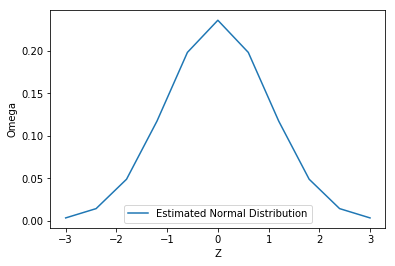

In [3]:
def prob2(mu, sigma, N, k):
    Z = np.linspace(mu-sigma*k, mu+sigma*k, N)
    w = np.zeros(N)
    w[0] = stats.norm.cdf(((Z[0]+Z[1])/2), loc= mu, scale = sigma)
    w[N-1] = 1- stats.norm.cdf(((Z[N-1]+Z[N-2])/2), loc= mu, scale= sigma)
    for i in range(1,N-1):
        w[i] = stats.norm.cdf(((Z[i]+Z[i+1])/2),loc=mu, scale= sigma) - stats.norm.cdf(((Z[i]+Z[i-1])/2),loc=mu, scale= sigma)
    return w,Z

omega, Z = prob2(0,1,11,3)
plt.plot(Z, omega, label='Estimated Normal Distribution')
plt.xlabel('Z')
plt.ylabel('Omega')
plt.legend()
plt.show()
    

Problem 3

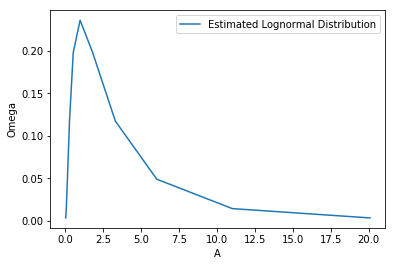

In [4]:
omega, Z = prob2(0,1,11,3)
A = np.exp(Z)
plt.plot(A, omega, label='Estimated Lognormal Distribution')
plt.xlabel('A')
plt.ylabel('Omega')
plt.legend()
plt.show()

Problem 4

In [5]:
omega,Z = prob2(10.5, 0.8, 10000,10)
Y = np.exp(Z)
estimated_mean=np.sum(omega*Y)
actual_mean = np.exp(10.5+(1/2)*0.8**2)
error = np.abs(estimated_mean- actual_mean)
print('The error between estimated mean and actual mean is: ', error)

The error between estimated mean and actual mean is:  0.005335583038686309


Problem 5

In [6]:
def g(x):
    func = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
    return func

def criterion_func(params, *args):
    w_1, w_2, w_3, x_1, x_2, x_3 = params
    a,b = args
    error_1= (w_1+w_2+w_3 - (b-a))
    error_2 = (w_1*x_1 + w_2*x_2+w_3*x_3 - (1/2)*(b**2 - a**2))
    error_3 = (w_1*x_1**2 + w_2*x_2**2 + w_3*x_3**2 - (1/3)*(b**3-a**3))
    error_4 = (w_1*x_1**3 + w_2*x_2**3 + w_3*x_3**3 - (1/4)*(b**4 - a**4))
    error_5 = (w_1*x_1**4 + w_2*x_2**4 + w_3*x_3**4 - (1/5)*(b**5-a**5))
    error_6 = (w_1*x_1**5 + w_2*x_2**5 + w_3*x_3**5- (1/6)*(b**6- a**6))
    error_vec = np.array([error_1, error_2, error_3, error_4, error_5, error_6])
    return error_vec

w_1_init = 0.5
w_2_init = 1
w_3_init = 0.5
x_1_init = 1
x_2_init = 1 
x_3_init = 1
params_init = np.array([w_1_init, w_2_init, w_3_init, x_1_init, x_2_init, x_3_init])
opt_args = -10,10
results = opt.root(criterion_func, params_init, args= (opt_args), tol = 1e-10)
p = results.x
omega = p[:3]
x = p[3:]
function_val = g(x)
print('The value of the integral by Gaussian Quadrature is: ',np.sum(omega*function_val))

The value of the integral by Gaussian Quadrature is:  4373.333333332431


Problem 6

In [7]:
def g(x):
    func = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
    return func
    
print('The error between the exact value of the integral and scipy is: ', 
      intgr.quad(g, -10,10)[0] - 4373.33333333333)

The error between the exact value of the integral and scipy is:  3.637978807091713e-12


Problem 7

In [25]:
def monte(dom_low, dom_high, N):
    area = (np.abs(dom_high-dom_low))**2
    draws = np.random.uniform(low=dom_low, high= dom_high, size=(N,2))
    values= np.empty(N)
    for i in range(N):
        values[i] = g(draws[i,0], draws[i,1])
    monte = area*(1/N)*np.sum(values)
    return monte
    
def g(x,y):
    if x**2+y**2 <=1:
        func = 1
    else:
        func=0
    return func

monte(-1,1,1000000)
        
        

3.14154

Problem 8

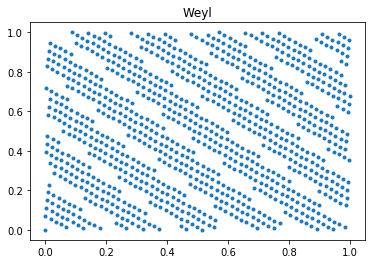

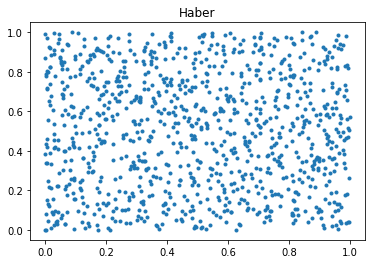

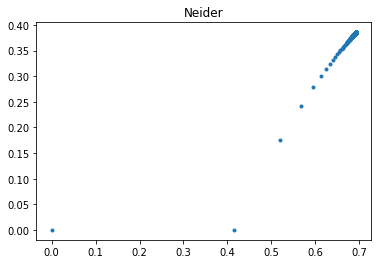

In [4]:
def equidist(N,d):
    primes = np.empty(0)
    for i in range(1,d+1):
        primes = np.append(primes, sympy.prime(i))
    #primes contains the first d primes
    weyl_mat = np.zeros((d,N))
    haber_mat = np.zeros((d,N))
    neider_mat = np.zeros((d,N))
    
    for i, value in enumerate(primes):
        for j in range(N):
            weyl_mat[i,j] = math.modf(j*(value)**(1/2))[0]
            haber_mat[i,j] = math.modf(((j*(j+1))/2)*(value)**(1/2))[0]
            neider_mat[i,j] = math.modf(j*2**((i+1)/(j+1)))[0]
    return weyl_mat, haber_mat, neider_mat
        
W,H,N = equidist(1000,2)
plt.plot(W[0,:], W[1,:],'.')
plt.title('Weyl')
plt.show()
plt.plot(H[0,:], H[1,:],'.')
plt.title('Haber')
plt.show()
plt.plot(N[0,:], N[1,:],'.')
plt.title('Neider')
plt.show()


In [92]:
def equidist(N,d):
    primes = np.empty(0)
    for i in range(1,d+1):
        primes = np.append(primes, sympy.prime(i))
    #primes contains the first d primes
    weyl_mat = np.zeros((d,N))
    haber_mat = np.zeros((d,N))
    neider_mat = np.zeros((d,N))
    
    for i, value in enumerate(primes):
        for j in range(N):
            weyl_mat[i,j] = math.modf(j*(value)**(1/2))[0]
            haber_mat[i,j] = math.modf(((j*(j+1))/2)*(value)**(1/2))[0]
            neider_mat[i,j] = math.modf(j*2**((i+1)/(j+1)))[0]
    return weyl_mat, haber_mat, neider_mat

def g(x,y):
    if x**2+y**2 <=1:
        func = 1
    else:
        func=0
    return func

def monte(N, weyl_mat, haber_mat):
    area = 4
    values_weyl= np.empty(N)
    values_haber= np.empty(N)
    for i in range(N):
        values_weyl[i] = g(weyl_mat[0,i], weyl_mat[1,i])
        values_haber[i] = g(haber_mat[0,i], haber_mat[1,i])
    monte_weyl = area*(1/N)*np.sum(values_weyl)
    monte_haber = area*(1/N)*np.sum(values_haber)
    return monte_weyl, monte_haber


N = 10000
weyl_mat, haber_mat, neider_mat = equidist(N,2)
#Rescaling
weyl_mat = weyl_mat*2 - 1
haber_mat = haber_mat*2 - 1 
neider_mat = neider_mat*2 - 1

monte_weyl, monte_haber = monte(N, weyl_mat, haber_mat)
print('Estimation of pi using Weyl Method: ', monte_weyl)
print('Estimation of pi using Haber Method: ', monte_haber)
print('Rate of Convergence of Quasi Monte Carlo: ', (np.log(N)**2)/N)
print('Rate of Convergence of Monte Carlo: ', 1/((N)**(1/2)))


Estimation of pi using Weyl Method:  3.1416
Estimation of pi using Haber Method:  3.1456
Rate of Convergence of Quasi Monte Carlo:  0.008483036976765439
Rate of Convergence of Monte Carlo:  0.01
